In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
from feature_extraction import MFCC
from model import kNN
from data_loader import DataLoader

In [6]:
df_v1 = pd.read_csv(os.path.join(os.getcwd(), 'runs_version_1.csv'))
df_v2 = pd.read_csv(os.path.join(os.getcwd(), 'runs_version_2.csv'))
df_v3 = pd.read_csv(os.path.join(os.getcwd(), 'runs_version_3.csv'))

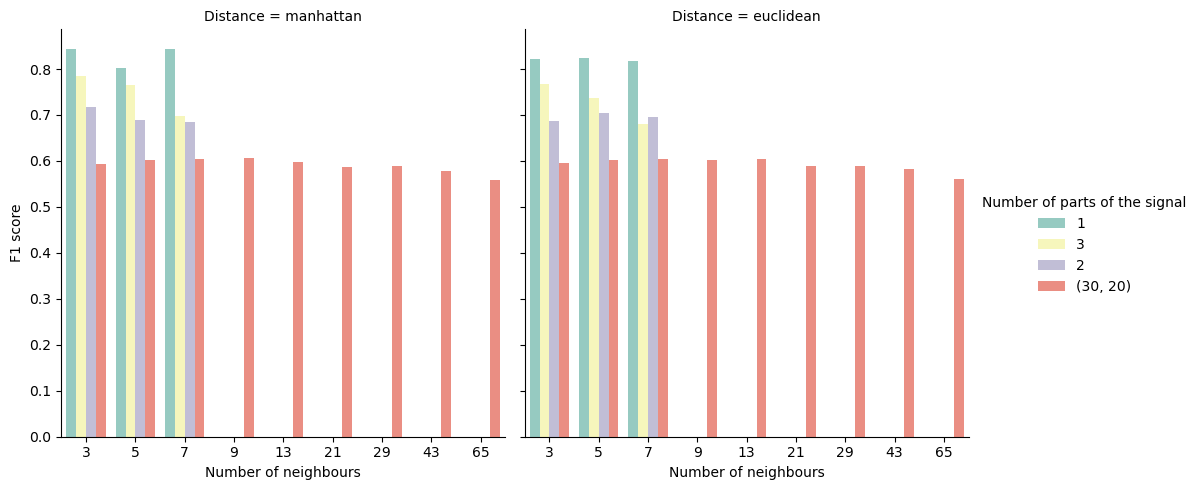

In [4]:
palette = sns.set_palette('Set3', n_colors=4)
sns.catplot(data=df_v1,x='Number of neighbours', y='F1 score', col='Distance',hue='Number of parts of the signal', kind='bar', palette=palette)
plt.show()


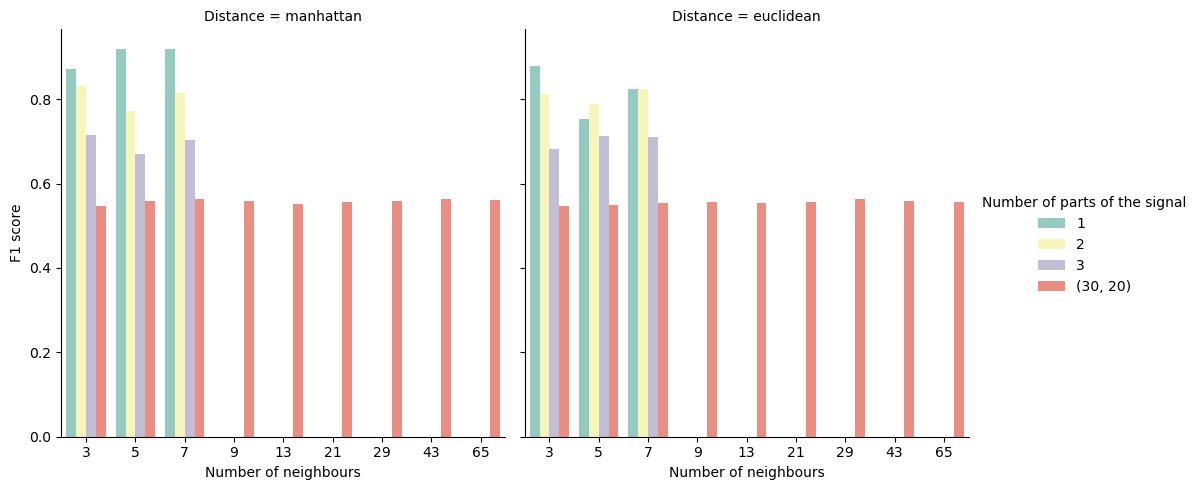

In [5]:
sns.catplot(data=df_v2,x='Number of neighbours', y='F1 score', col='Distance',hue='Number of parts of the signal', kind='bar', palette=palette)
plt.show()


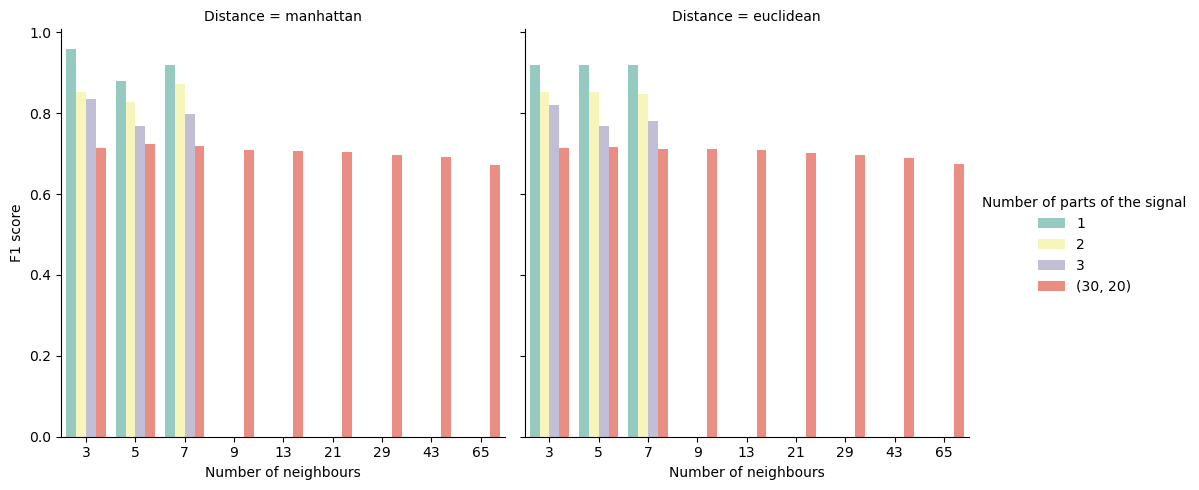

In [7]:
sns.catplot(data=df_v3,x='Number of neighbours', y='F1 score', col='Distance',hue='Number of parts of the signal', kind='bar', palette=palette)
plt.show()


In [8]:
distance = 'manhattan'
parts = 1
k=3
maxmel = 8000
melbands = 15


working_dir = os.getcwd()
data_path_test = os.path.join(working_dir, '..', 'Data', 'version 1','test')
data_path_train = os.path.join(working_dir, '..', 'Data', 'version 1', 'train')

In [9]:
feature_extractor = MFCC(melbands, maxmel, parts)
train = DataLoader(feature_extractor, data_path_train)
test = DataLoader(feature_extractor, data_path_test) 

model = kNN(k=k, distance=distance)
model.fit(train.data,train.labels)
predictions, f1, precision, recall = model.predict(test.data, test.labels)


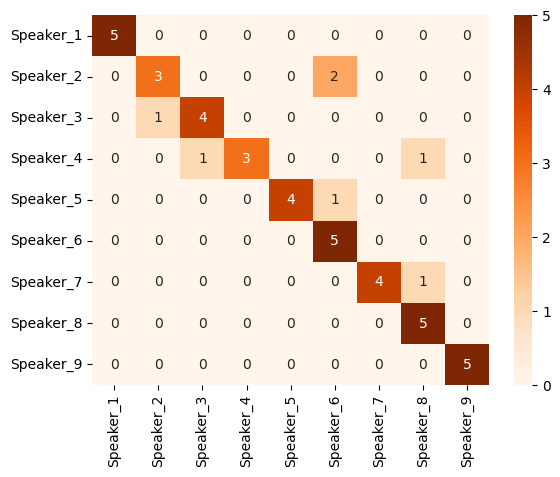

In [10]:
columns = ['%s' %(i) for i in np.unique(test.labels)]

cm = confusion_matrix(y_true=test.labels, y_pred=predictions)
df_cm = pd.DataFrame(cm, index=columns, columns=columns)
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True)
plt.show()

In [11]:
test.labels

array(['Speaker_1', 'Speaker_1', 'Speaker_1', 'Speaker_1', 'Speaker_1',
       'Speaker_2', 'Speaker_2', 'Speaker_2', 'Speaker_2', 'Speaker_2',
       'Speaker_3', 'Speaker_3', 'Speaker_3', 'Speaker_3', 'Speaker_3',
       'Speaker_4', 'Speaker_4', 'Speaker_4', 'Speaker_4', 'Speaker_4',
       'Speaker_5', 'Speaker_5', 'Speaker_5', 'Speaker_5', 'Speaker_5',
       'Speaker_6', 'Speaker_6', 'Speaker_6', 'Speaker_6', 'Speaker_6',
       'Speaker_7', 'Speaker_7', 'Speaker_7', 'Speaker_7', 'Speaker_7',
       'Speaker_8', 'Speaker_8', 'Speaker_8', 'Speaker_8', 'Speaker_8',
       'Speaker_9', 'Speaker_9', 'Speaker_9', 'Speaker_9', 'Speaker_9'],
      dtype=object)

In [12]:
predictions

['Speaker_1',
 'Speaker_1',
 'Speaker_1',
 'Speaker_1',
 'Speaker_1',
 'Speaker_2',
 'Speaker_2',
 'Speaker_6',
 'Speaker_6',
 'Speaker_2',
 'Speaker_3',
 'Speaker_3',
 'Speaker_3',
 'Speaker_3',
 'Speaker_2',
 'Speaker_4',
 'Speaker_4',
 'Speaker_8',
 'Speaker_4',
 'Speaker_3',
 'Speaker_5',
 'Speaker_5',
 'Speaker_5',
 'Speaker_6',
 'Speaker_5',
 'Speaker_6',
 'Speaker_6',
 'Speaker_6',
 'Speaker_6',
 'Speaker_6',
 'Speaker_7',
 'Speaker_7',
 'Speaker_7',
 'Speaker_7',
 'Speaker_8',
 'Speaker_8',
 'Speaker_8',
 'Speaker_8',
 'Speaker_8',
 'Speaker_8',
 'Speaker_9',
 'Speaker_9',
 'Speaker_9',
 'Speaker_9',
 'Speaker_9']